In [1]:
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
permits = pd.read_csv('OriginalData/buildingpermits.csv', encoding = "ISO-8859-1")

In [6]:
permits.head(100)

,PermitNumber,WORKTYPE,PermitTypeDescr,DESCRIPTION,Comments,APPLICANT,DECLARED_VALUATION,TOTAL_FEES,ISSUED_DATE,EXPIRATION_DATE,...,OWNER,OCCUPANCYTYPE,sq_feet,ADDRESS,CITY,STATE,ZIP,Property_ID,Parcel_ID,Location
0,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,40000.0,429.00,11/4/2011 11:04,5/4/2012 0:00,...,CITY OF BOSTON,Comm,170.0,175 W Boundary RD,West Roxbury,MA,2132,17268.0,2.012032e+09,"(42.260750000, -71.149610000)"
1,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,NaN,15000.0,206.00,1/3/2013 14:13,7/3/2013 0:00,...,MIARA SIMON,1-2FAM,0.0,14 William Jackson AVE,Brighton,MA,2135,149852.0,2.204944e+09,"(42.344600000, -71.154050000)"
2,A100764,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Interior and exterior work as indicated on dra...,Gregory Pomeroy,750000.0,7565.00,1/5/2012 10:57,7/5/2012 0:00,...,CARSON DAVID THOMAS TS,1-2FAM,3663.0,81 Chestnut ST,Boston,MA,2108,31492.0,5.023630e+08,"(42.356838000, -71.071231000)"
3,A100858,EXTDEM,Amendment to a Long Form,Demolition - Exterior,Landmark letter and permit submittal on existi...,Arthur Choo,0.0,20.00,8/21/2012 12:27,2/21/2013 0:00,...,SDS HOSPITALITY LLC,Comm,0.0,81 S Huntington AVE,Jamaica Plain,MA,2199,76833.0,1.001624e+09,"(42.329910000, -71.111540000)"
4,A101019,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Amendment to add bathroom bedroom 3rd floor,JOHN MAHONY,4000.0,75.00,11/25/2011 11:20,5/25/2012 0:00,...,TROTMAN GERALD A,1-2FAM,1950.0,2 Clarkson ST,Dorchester,MA,2125,33505.0,1.502933e+09,"(42.309550000, -71.065430000)"
5,A101208,EXTREN,Amendment to a Long Form,Renovations - Exterior,Amending alt77244/2011 - changes being made to...,Mike Zaisser,600.0,32.00,10/21/2011 15:49,4/21/2012 0:00,...,SMYTHE ALICE P,1-2FAM,0.0,21-23 Lee ST,Jamaica Plain,MA,2130,84830.0,1.103034e+09,"(42.307200000, -71.111910000)"
6,A101379,INTREN,Amendment to a Long Form,Renovations -Interior NSC,Amend Long Form Permit 10-0840 As Follows: Mod...,Stephen Weinig,200000.0,2092.00,7/11/2012 13:29,1/11/2013 0:00,...,DYER DENNIS,Mixed,0.0,244 Newbury ST,Boston,MA,2116,101456.0,5.031610e+08,"(42.349410000, -71.082400000)"
7,A101551,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Finishing basement;as part of the first floor ...,Christine McMahon,50000.0,562.00,4/26/2012 18:06,10/26/2012 0:00,...,ONE-08 N STREET CONDOMINIUM,1-2FAM,680.0,108 N ST,South Boston,MA,2127,100043.0,6.042520e+08,"(42.334520000, -71.031083000)"
8,A101691,COB,Amendment to a Long Form,City of Boston,New Trash Compactor and Lift,Paul Hardiman Jr.,63444.0,669.00,11/15/2011 12:01,5/15/2012 0:00,...,BOSTON REDEVELOPMNT AUTH,Multi,0.0,1990 Columbus AVE,Roxbury,MA,2119,35523.0,1.101630e+09,"(42.315320000, -71.097200000)"
9,A101698,OTHER,Amendment to a Long Form,Other,application to amend existing permit # ALT 767...,Garland Building Company,0.0,20.00,11/30/2011 13:36,5/30/2012 0:00,...,99 SUMMER OWNER LLC,Comm,1500.0,99 Summer ST,Boston,MA,2110,132058.0,3.045760e+08,"(42.353490000, -71.058660000)"


In [7]:
permits['SolarPanel'] = 0
permits['HeatPumps'] = 0
permits['Insulation'] = 0
permits['Windows'] = 0

In [8]:
#get head 
permits.shape #last column index 24

(380607, 25)

In [9]:
#solar panels
#plurals don't need to be considered
for i in ([(21,'solar panel|solarpanel|solar'), (22, 'heat pump|heatpump'), (23, 'insulation'), (24, 'window')]):
    tmp = permits[permits['Comments'].str.lower().str.contains(i[1]) == True]
    #get index list
    listindex = tmp.index.tolist()
    #add to the column
    permits.iloc[listindex, i[0]] = 1

In [10]:
#graph the distribution
#DESCRIPTION
permits["DESCRIPTION"] = permits.DESCRIPTION.astype('category')
permits.DESCRIPTION.unique()

[City of Boston, Renovations - Exterior, Interior/Exterior Work, Demolition - Exterior, Renovations -Interior  NSC, ..., Fencing, Special Event, Installation/Evaluation of Mat, Dumpsters, Staging]
Length: 78
Categories (77, object): [City of Boston, Renovations - Exterior, Interior/Exterior Work, Demolition - Exterior, ..., Special Event, Installation/Evaluation of Mat, Dumpsters, Staging]

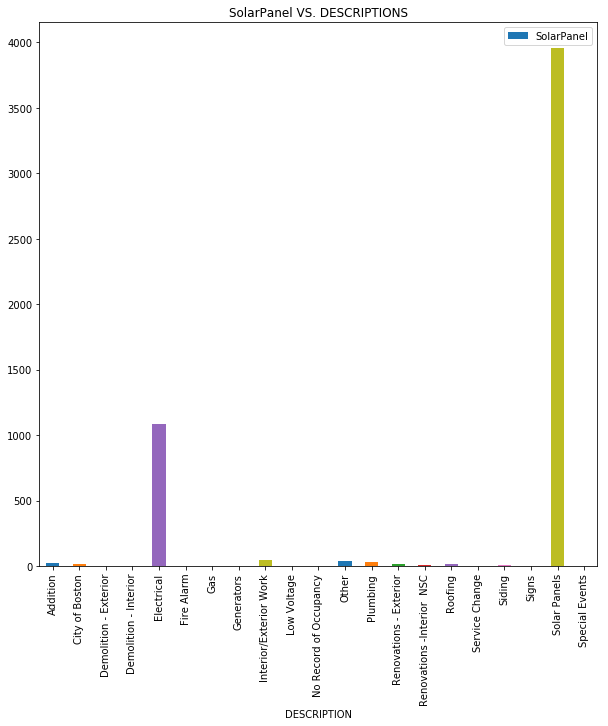

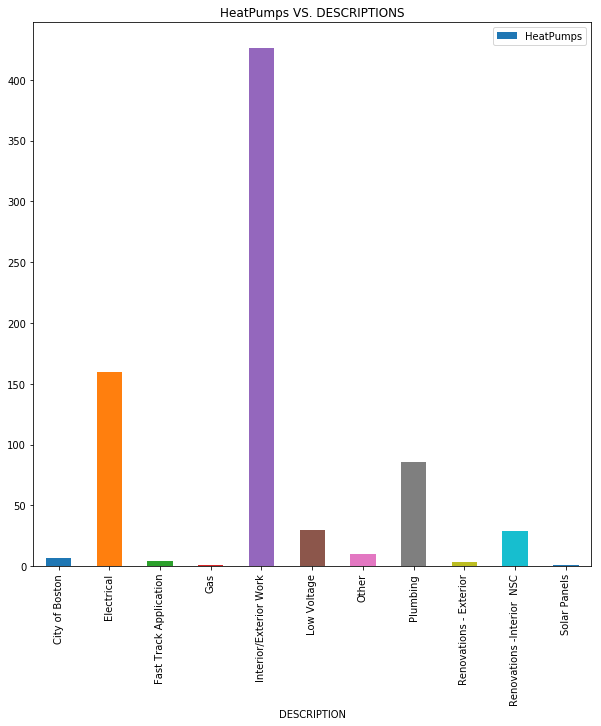

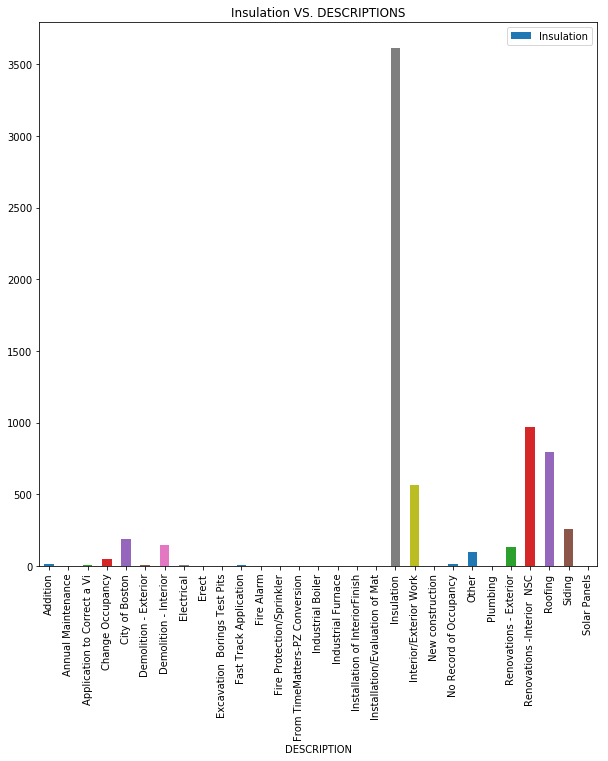

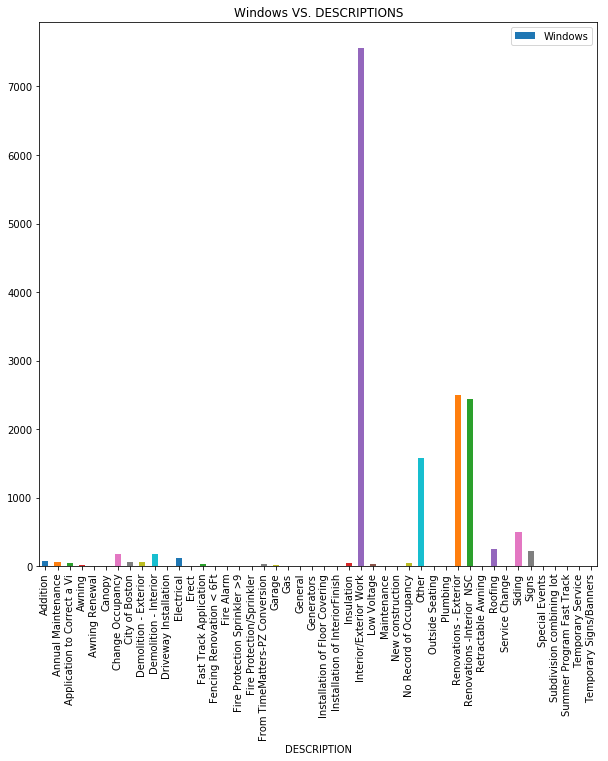

In [11]:
fulldata = list()
import numpy as np
for i in ["SolarPanel", "HeatPumps", "Insulation", "Windows"]:
    data = pd.DataFrame(permits.groupby(["DESCRIPTION", i], as_index = False).size().unstack().reset_index())
    data.columns = ['DESCRIPTION', 'NonTarget', i]
    data = data[~np.isnan(data[i])]
    fulldata.append(data)
    fig, ax = plt.subplots(figsize = (10,10))
    titlename = i + " VS. DESCRIPTIONS"
    data.plot(x = "DESCRIPTION", y = i, ax = ax, kind = "bar", title = titlename)
    plt.show()

In [12]:
fulldata

[                   DESCRIPTION  NonTarget  SolarPanel
 0                     Addition     1710.0        22.0
 10              City of Boston     4314.0        15.0
 12       Demolition - Exterior      950.0         1.0
 13       Demolition - Interior     4977.0         1.0
 16                  Electrical    78174.0      1085.0
 23                  Fire Alarm    19424.0         1.0
 29                         Gas    37462.0         1.0
 31                  Generators      427.0         1.0
 40      Interior/Exterior Work    20234.0        49.0
 41                 Low Voltage    28068.0         2.0
 45      No Record of Occupancy     1676.0         3.0
 46                       Other    13408.0        39.0
 48                    Plumbing    50383.0        28.0
 52      Renovations - Exterior    13482.0        12.0
 53  Renovations -Interior  NSC    33035.0         6.0
 57                     Roofing    12304.0        17.0
 59              Service Change     1979.0         1.0
 60       

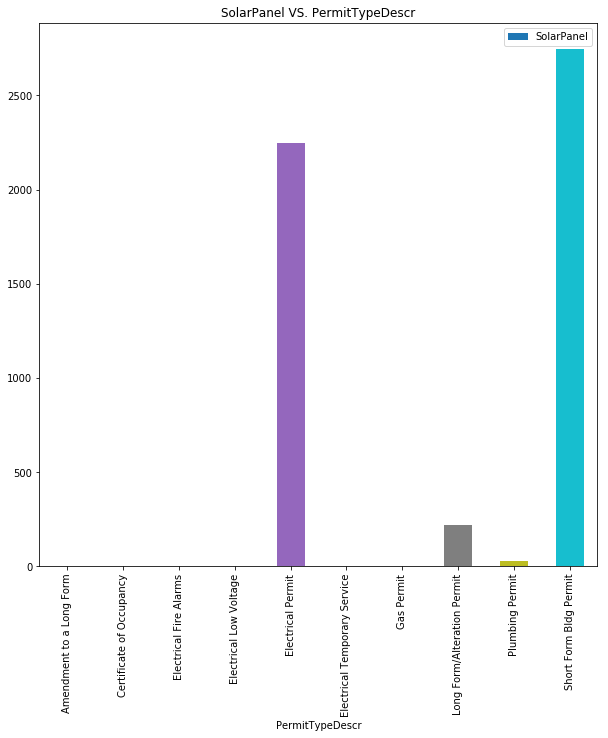

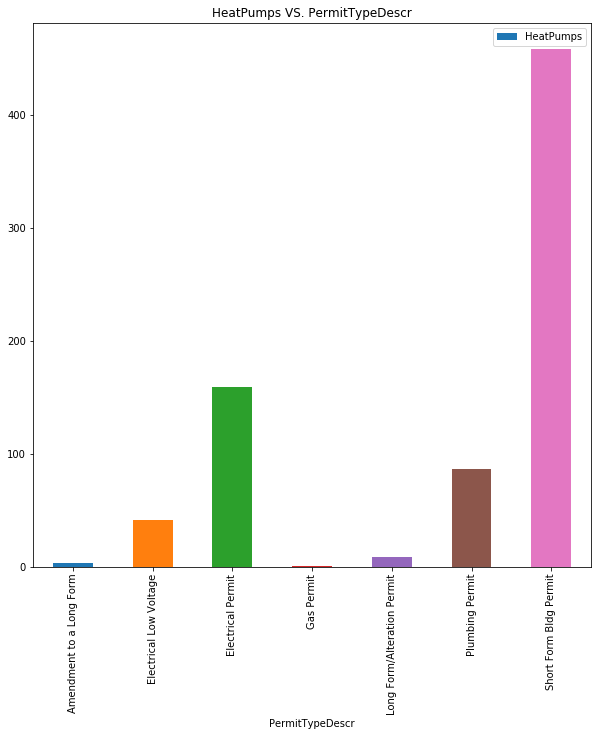

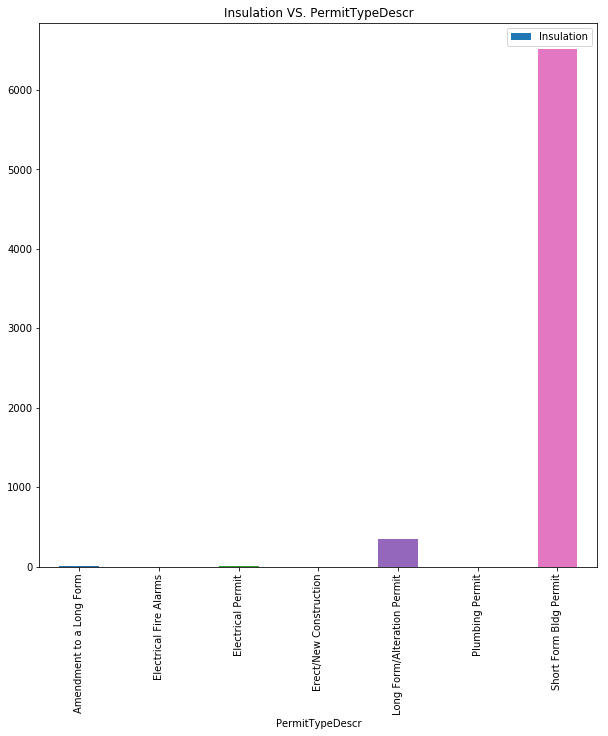

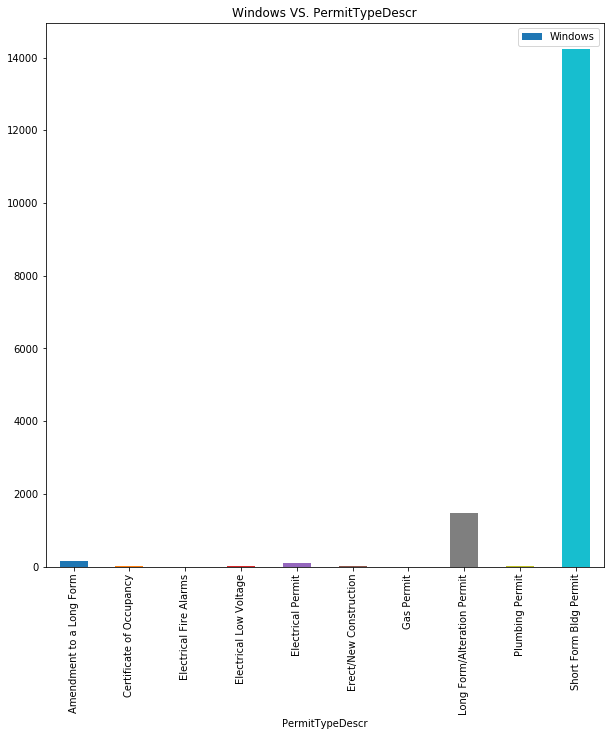

In [13]:
fulldata2 = pd.DataFrame()
import numpy as np
for i in ["SolarPanel", "HeatPumps", "Insulation", "Windows"]:
    data = pd.DataFrame(permits.groupby(["PermitTypeDescr", i], as_index = False).size().unstack().reset_index())
    data.columns = ['PermitTypeDescr', 'NonTarget', i]
    data = data[~np.isnan(data[i])]
    fulldata = fulldata2.append(data)
    fig, ax = plt.subplots(figsize = (10,10))
    titlename = i + " VS. PermitTypeDescr"
    data.plot(x = "PermitTypeDescr", y = i, ax = ax, kind = "bar", title = titlename)
    plt.show()

In [14]:
permits.to_csv("PermitsAdded4Columns.csv")

## Descriptions where HeatPumps <= 10, look at the Comments of those permits to see whether or not they are referring to installation or capacity.

In [15]:
### heat pumps
hp = pd.DataFrame(permits.groupby(["DESCRIPTION", "HeatPumps"], as_index = False).size().unstack().reset_index())
hp.columns = ['DESCRIPTION', 'NonTarget', "HeatPumps"]
hp = hp[~np.isnan(hp["HeatPumps"])]

In [16]:
hp#heat pump data
# City of Boston Fast Track Application Gas Renovations - Exterior Solar Panels

,DESCRIPTION,NonTarget,HeatPumps
10,City of Boston,4322.0,7.0
16,Electrical,79099.0,160.0
19,Fast Track Application,7126.0,4.0
29,Gas,37462.0,1.0
40,Interior/Exterior Work,19857.0,426.0
41,Low Voltage,28040.0,30.0
46,Other,13437.0,10.0
48,Plumbing,50325.0,86.0
52,Renovations - Exterior,13491.0,3.0
53,Renovations -Interior NSC,33012.0,29.0


In [66]:
# Get Descriptions where Heat Pmups < = 10
deshpless10 = hp[hp.HeatPumps <= 10].DESCRIPTION.tolist()
# Get original data where descriptions belong to deshpless10(list above)
permitsdeshpless10 = permits[permits.DESCRIPTION.isin(deshpless10)]

In [67]:
permitsdeshpless10
print("Descriptions where HP < = 10",permitsdeshpless10.shape, "\nOverall shape",permits.shape)

Descriptions where HP < = 10 (80611, 25) 
Overall shape (380607, 25)


In [68]:
#filter comments in subset data and see whether it contains installation/capacity
permitsdeshpless10["Comments"] = permitsdeshpless10["Comments"].fillna(value = '')

print("Shape for dataset Comments column contain installation/capacity while description belong to the group of descriptions for Heat Pumps <= 10\n",permitsdeshpless10[permitsdeshpless10.Comments.str.lower().str.contains('installation|install|capacity') == True].shape)


tmp1 = permitsdeshpless10[permitsdeshpless10.Comments.str.lower().str.contains('installation|install|capacity') == True]

C:\Users\cindy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Shape for dataset Comments column contain installation/capacity while description belong to the group of descriptions for Heat Pumps <= 10
 (21742, 25)


In [69]:
permitsdeshpless10

,PermitNumber,WORKTYPE,PermitTypeDescr,DESCRIPTION,Comments,APPLICANT,DECLARED_VALUATION,TOTAL_FEES,ISSUED_DATE,EXPIRATION_DATE,...,CITY,STATE,ZIP,Property_ID,Parcel_ID,Location,SolarPanel,HeatPumps,Insulation,Windows
0,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,40000.0,429.0,11/4/2011 11:04,5/4/2012 0:00,...,West Roxbury,MA,2132,17268.0,2.012032e+09,"(42.260750000, -71.149610000)",0,0,0,0
1,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,NaN,15000.0,206.0,1/3/2013 14:13,7/3/2013 0:00,...,Brighton,MA,2135,149852.0,2.204944e+09,"(42.344600000, -71.154050000)",0,0,0,0
5,A101208,EXTREN,Amendment to a Long Form,Renovations - Exterior,Amending alt77244/2011 - changes being made to...,Mike Zaisser,600.0,32.0,10/21/2011 15:49,4/21/2012 0:00,...,Jamaica Plain,MA,2130,84830.0,1.103034e+09,"(42.307200000, -71.111910000)",0,0,0,0
8,A101691,COB,Amendment to a Long Form,City of Boston,New Trash Compactor and Lift,Paul Hardiman Jr.,63444.0,669.0,11/15/2011 12:01,5/15/2012 0:00,...,Roxbury,MA,2119,35523.0,1.101630e+09,"(42.315320000, -71.097200000)",0,0,0,0
9,A101698,OTHER,Amendment to a Long Form,Other,application to amend existing permit # ALT 767...,Garland Building Company,0.0,20.0,11/30/2011 13:36,5/30/2012 0:00,...,Boston,MA,2110,132058.0,3.045760e+08,"(42.353490000, -71.058660000)",0,0,0,0
11,A101982,OTHER,Amendment to a Long Form,Other,Amend fast track permit # ALT 87061. Work to i...,Garland Building Company,50000.0,788.0,11/30/2011 13:53,5/30/2012 0:00,...,Boston,MA,2109,20467.0,3.038240e+08,"(42.358380000, -71.053950000)",0,0,0,0
12,A102166,OTHER,Amendment to a Long Form,Other,Revised 2hr wall detail for seperation between...,SEAPORT RESIDENTIAL LLC,0.0,20.0,12/23/2011 15:39,6/23/2012 0:00,...,South Boston,MA,2127,171470.0,6.011610e+08,"(42.337856000, -71.048704000)",0,0,0,0
13,A102168,OTHER,Amendment to a Long Form,Other,Revised BRA APPROVED PLANS *** AMEND PARENT AP...,SEAPORT RESIDENTIAL LLC,0.0,42.0,12/29/2011 8:53,6/29/2012 0:00,...,South Boston,MA,2127,171470.0,6.011610e+08,"(42.337856000, -71.048704000)",0,0,0,0
18,A103733,EXTREN,Amendment to a Long Form,Renovations - Exterior,Erect 11';x 5';Rear Deck off first floor of;bu...,DAVID BERRY,5000.0,82.0,11/10/2011 15:09,5/10/2012 0:00,...,Roxbury,MA,2118,22282.0,4.004350e+08,"(42.342720000, -71.075790000)",0,0,0,0
19,A103962,EXTREN,Amendment to a Long Form,Renovations - Exterior,enclose second floor front;porch.,Trevor Clarke,2000.0,52.0,12/30/2011 9:43,6/30/2012 0:00,...,Dorchester,MA,2121,19103.0,1.402585e+09,"(42.298940000, -71.082570000)",0,0,0,0


In [70]:
tmp1.index # get the index
permitsdeshpless10["InstallationOrCapacity"] = 0 # default the subset data(certain description) not having installation/capacity
permitsdeshpless10.loc[tmp1.index, "InstallationOrCapacity"] = 1 # change to 1 by index
permitsdeshpless10

C:\Users\cindy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\cindy\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,PermitNumber,WORKTYPE,PermitTypeDescr,DESCRIPTION,Comments,APPLICANT,DECLARED_VALUATION,TOTAL_FEES,ISSUED_DATE,EXPIRATION_DATE,...,STATE,ZIP,Property_ID,Parcel_ID,Location,SolarPanel,HeatPumps,Insulation,Windows,InstallationOrCapacity
0,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,40000.0,429.0,11/4/2011 11:04,5/4/2012 0:00,...,MA,2132,17268.0,2.012032e+09,"(42.260750000, -71.149610000)",0,0,0,0,0
1,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,NaN,15000.0,206.0,1/3/2013 14:13,7/3/2013 0:00,...,MA,2135,149852.0,2.204944e+09,"(42.344600000, -71.154050000)",0,0,0,0,0
5,A101208,EXTREN,Amendment to a Long Form,Renovations - Exterior,Amending alt77244/2011 - changes being made to...,Mike Zaisser,600.0,32.0,10/21/2011 15:49,4/21/2012 0:00,...,MA,2130,84830.0,1.103034e+09,"(42.307200000, -71.111910000)",0,0,0,0,0
8,A101691,COB,Amendment to a Long Form,City of Boston,New Trash Compactor and Lift,Paul Hardiman Jr.,63444.0,669.0,11/15/2011 12:01,5/15/2012 0:00,...,MA,2119,35523.0,1.101630e+09,"(42.315320000, -71.097200000)",0,0,0,0,0
9,A101698,OTHER,Amendment to a Long Form,Other,application to amend existing permit # ALT 767...,Garland Building Company,0.0,20.0,11/30/2011 13:36,5/30/2012 0:00,...,MA,2110,132058.0,3.045760e+08,"(42.353490000, -71.058660000)",0,0,0,0,0
11,A101982,OTHER,Amendment to a Long Form,Other,Amend fast track permit # ALT 87061. Work to i...,Garland Building Company,50000.0,788.0,11/30/2011 13:53,5/30/2012 0:00,...,MA,2109,20467.0,3.038240e+08,"(42.358380000, -71.053950000)",0,0,0,0,0
12,A102166,OTHER,Amendment to a Long Form,Other,Revised 2hr wall detail for seperation between...,SEAPORT RESIDENTIAL LLC,0.0,20.0,12/23/2011 15:39,6/23/2012 0:00,...,MA,2127,171470.0,6.011610e+08,"(42.337856000, -71.048704000)",0,0,0,0,0
13,A102168,OTHER,Amendment to a Long Form,Other,Revised BRA APPROVED PLANS *** AMEND PARENT AP...,SEAPORT RESIDENTIAL LLC,0.0,42.0,12/29/2011 8:53,6/29/2012 0:00,...,MA,2127,171470.0,6.011610e+08,"(42.337856000, -71.048704000)",0,0,0,0,0
18,A103733,EXTREN,Amendment to a Long Form,Renovations - Exterior,Erect 11';x 5';Rear Deck off first floor of;bu...,DAVID BERRY,5000.0,82.0,11/10/2011 15:09,5/10/2012 0:00,...,MA,2118,22282.0,4.004350e+08,"(42.342720000, -71.075790000)",0,0,0,0,0
19,A103962,EXTREN,Amendment to a Long Form,Renovations - Exterior,enclose second floor front;porch.,Trevor Clarke,2000.0,52.0,12/30/2011 9:43,6/30/2012 0:00,...,MA,2121,19103.0,1.402585e+09,"(42.298940000, -71.082570000)",0,0,0,0,0


In [20]:
# Let's Calculate the percentage of Descriptions contain installation/capacity
print("Percentage that Comments column has capacity/installation divided by Descriptions where HP <= 10", tmp1.shape[0]/permitsdeshpless10.shape[0])
print("Percentage that Comeents column has capacity/installation divided by Total Raw Dataset", tmp1.shape[0]/permits.shape[0])


Percentage that Comments column has capacity/installation divided by Descriptions where HP <= 10 0.26971505129572887
Percentage that Comeents column has capacity/installation divided by Total Raw Dataset 0.05712454053656396


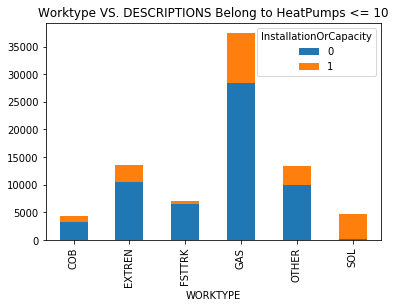

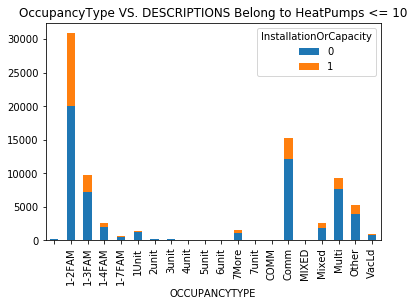

In [82]:
#Worktype VS. Installation/Capacity 2 columns

wkhp = permitsdeshpless10[["WORKTYPE", "InstallationOrCapacity"]].pivot_table(index='WORKTYPE', columns='InstallationOrCapacity', aggfunc=len, fill_value = 0)
wkhp.plot(kind = 'bar', stacked = True, title = 'Worktype VS. DESCRIPTIONS Belong to HeatPumps <= 10')
plt.show()
#Occupancy Type VS. HeatPumps = 0/1 2 columns
ochp = permitsdeshpless10[["OCCUPANCYTYPE", "InstallationOrCapacity"]].pivot_table(index='OCCUPANCYTYPE', columns='InstallationOrCapacity', aggfunc=len, fill_value = 0)
ochp.plot(kind = 'bar', stacked = True, title = 'OccupancyType VS. DESCRIPTIONS Belong to HeatPumps <= 10')
plt.show()

### Note This is under certain Descriptions(where HP < 10) Not All   



## Descriptions where HeatPumps > 10, look at the Comments of those permits to see whether or not they are referring to installation or capacity.

In [73]:
# See dataset where DESCRIPTIONS belong to group of HP > 10
# Get Descriptions where Heat Pmups > 10
deshpmore10 = hp[hp.HeatPumps > 10].DESCRIPTION.tolist()
# Get original data where descriptions belong to deshpless10(list above)
permitsdeshpmore10 = permits[permits.DESCRIPTION.isin(deshpmore10)]

In [75]:
print("Descriptions where HP > 10",permitsdeshpmore10.shape, "\nOverall shape",permits.shape)

Descriptions where HP > 10 (211064, 25) 
Overall shape (380607, 25)


In [77]:
#filter comments in subset data and see whether it contains installation/capacity
permitsdeshpmore10["Comments"] = permitsdeshpmore10["Comments"].fillna(value = '')

print("Shape for dataset Comments column contain installation/capacity while description belong to the group of descriptions for Heat Pumps <= 10\n",permitsdeshpmore10[permitsdeshpmore10.Comments.str.lower().str.contains('installation|install|capacity') == True].shape)


tmp2 = permitsdeshpmore10[permitsdeshpmore10.Comments.str.lower().str.contains('installation|install|capacity') == True]

C:\Users\cindy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Shape for dataset Comments column contain installation/capacity while description belong to the group of descriptions for Heat Pumps <= 10
 (66547, 25)


In [78]:
tmp2.index # get the index
permitsdeshpmore10["InstallationOrCapacity"] = 0 # default the subset data(certain description) not having installation/capacity
permitsdeshpmore10.loc[tmp2.index, "InstallationOrCapacity"] = 1 # change to 1 by index
permitsdeshpmore10

C:\Users\cindy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\cindy\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,PermitNumber,WORKTYPE,PermitTypeDescr,DESCRIPTION,Comments,APPLICANT,DECLARED_VALUATION,TOTAL_FEES,ISSUED_DATE,EXPIRATION_DATE,...,STATE,ZIP,Property_ID,Parcel_ID,Location,SolarPanel,HeatPumps,Insulation,Windows,InstallationOrCapacity
2,A100764,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Interior and exterior work as indicated on dra...,Gregory Pomeroy,750000.0,7565.0,1/5/2012 10:57,7/5/2012 0:00,...,MA,2108,31492.0,5.023630e+08,"(42.356838000, -71.071231000)",0,0,0,0,0
4,A101019,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Amendment to add bathroom bedroom 3rd floor,JOHN MAHONY,4000.0,75.0,11/25/2011 11:20,5/25/2012 0:00,...,MA,2125,33505.0,1.502933e+09,"(42.309550000, -71.065430000)",0,0,0,0,0
6,A101379,INTREN,Amendment to a Long Form,Renovations -Interior NSC,Amend Long Form Permit 10-0840 As Follows: Mod...,Stephen Weinig,200000.0,2092.0,7/11/2012 13:29,1/11/2013 0:00,...,MA,2116,101456.0,5.031610e+08,"(42.349410000, -71.082400000)",0,0,0,0,0
7,A101551,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Finishing basement;as part of the first floor ...,Christine McMahon,50000.0,562.0,4/26/2012 18:06,10/26/2012 0:00,...,MA,2127,100043.0,6.042520e+08,"(42.334520000, -71.031083000)",0,0,0,0,0
10,A101847,INTEXT,Amendment to a Long Form,Interior/Exterior Work,INSTALL NEW STOREFRONT SYSTEM NEW WINDOWS SI...,LUISHUN LAU,40000.0,438.0,11/30/2011 11:39,5/30/2012 0:00,...,MA,2134,148183.0,2.200863e+09,"(42.362670000, -71.135950000)",0,0,0,1,1
15,A102380,INTREN,Amendment to a Long Form,Renovations -Interior NSC,All cost associated with parent application #A...,Herbert M Beherrell,0.0,56.0,11/30/2011 12:41,,...,MA,2109,130426.0,3.038700e+08,"(42.358627000, -71.056320000)",0,0,0,0,0
16,A102730,INTREN,Amendment to a Long Form,Renovations -Interior NSC,COntractor will renovate existing bathrooms wi...,james quinn,40000.0,420.0,5/2/2012 12:30,11/2/2012 0:00,...,MA,2116,91572.0,5.027680e+08,"(42.353820000, -71.075940000)",0,0,0,0,0
17,A103065,INTEXT,Amendment to a Long Form,Interior/Exterior Work,amend ALT 1762 (dtd 4/7/10 and A31282 (dtd 8/2...,Roland Goodick,100000.0,1029.0,11/3/2011 12:40,5/3/2012 0:00,...,MA,2115,101568.0,5.030490e+08,"(42.348130000, -71.087060000)",0,0,0,0,1
20,A103982,INTREN,Amendment to a Long Form,Renovations -Interior NSC,To replace a concrete column with a new brick ...,MIKE ANDERSON,9000.0,116.0,11/22/2011 10:21,5/22/2012 0:00,...,MA,2135,156971.0,NaN,"(42.347149000, -71.163229000)",0,0,0,0,0
22,A104527,INTEXT,Amendment to a Long Form,Interior/Exterior Work,1); Change windows 1st &; 2nd Fl left side fro...,Howard Robinson,1000.0,36.0,2/7/2012 13:21,8/7/2012 0:00,...,MA,2120,343318.0,1.000561e+09,NaN,0,0,0,1,0


In [79]:
# Let's Calculate the percentage of Descriptions contain installation/capacity
print("Percentage that Comments column has capacity/installation divided by Descriptions where HP > 10", tmp2.shape[0]/permitsdeshpmore10.shape[0])
print("Percentage that Comeents column has capacity/installation divided by Total Raw Dataset", tmp2.shape[0]/permits.shape[0])


Percentage that Comments column has capacity/installation divided by Descriptions where HP > 10 0.3152929916992002
Percentage that Comeents column has capacity/installation divided by Total Raw Dataset 0.17484439329807386


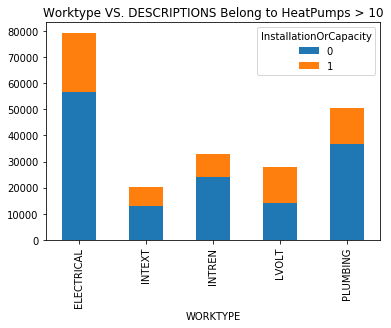

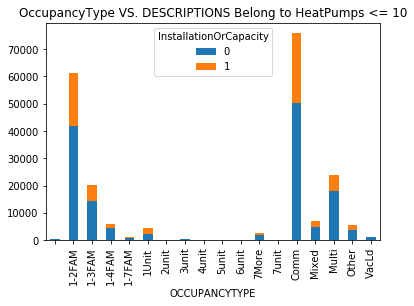

In [83]:
#Worktype VS. Installation/Capacity 2 columns

wkhp2 = permitsdeshpmore10[["WORKTYPE", "InstallationOrCapacity"]].pivot_table(index='WORKTYPE', columns='InstallationOrCapacity', aggfunc=len, fill_value = 0)
wkhp2.plot(kind = 'bar', stacked = True, title = 'Worktype VS. DESCRIPTIONS Belong to HeatPumps > 10')
plt.show()
#Occupancy Type VS. HeatPumps = 0/1 2 columns
ochp2 = permitsdeshpmore10[["OCCUPANCYTYPE", "InstallationOrCapacity"]].pivot_table(index='OCCUPANCYTYPE', columns='InstallationOrCapacity', aggfunc=len, fill_value = 0)
ochp2.plot(kind = 'bar', stacked = True, title = 'OccupancyType VS. DESCRIPTIONS Belong to HeatPumps <= 10')
plt.show()

### Note This is under certain Descriptions(where HP < 10) Not All   



## Heatmaps

In [86]:
permits.HeatPumps = permits["HeatPumps"].astype('category')


from plotnine import * 

fig = plt.figure()


ggplot(flight_rows, aes('year', 'month')) + geom_tile(aes(fill='passengers'))\
    + scale_fill_gradientn(colors=['#9ebcda','#8c6bb1','#88419d','#6e016b']) \
    + ggtitle("Heatmap of Flight Density from 1949 to 1961")

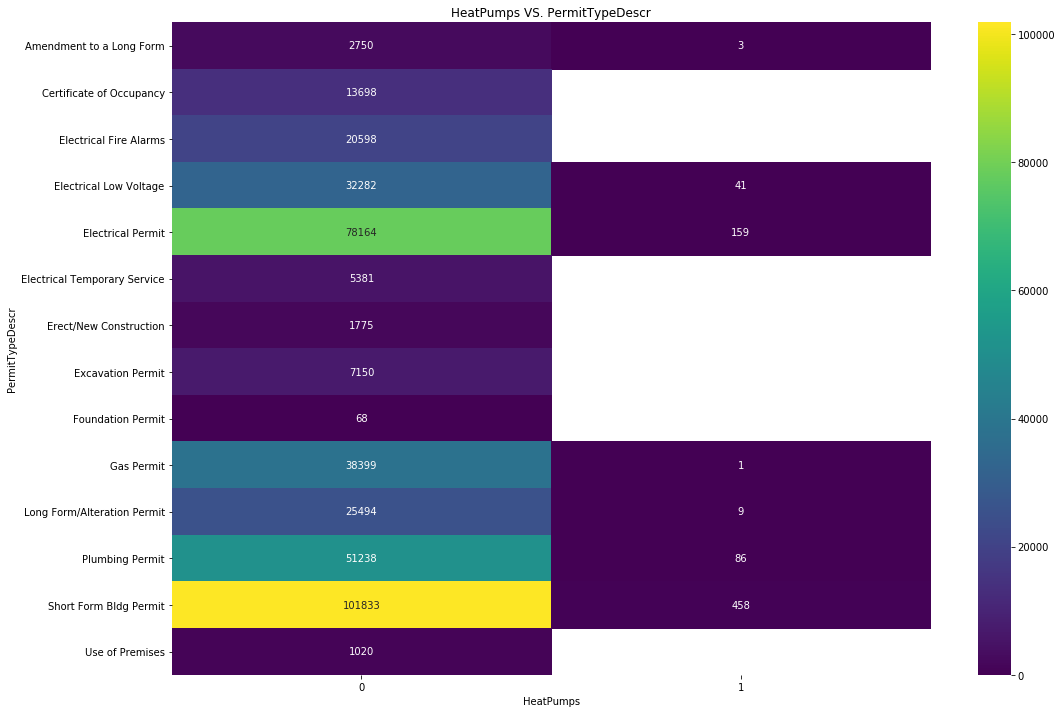

In [95]:
#HeatPumps vs PermitTypeDescr
hm1 = permits[["PermitTypeDescr", "HeatPumps"]].pivot_table(index='PermitTypeDescr', columns='HeatPumps', aggfunc=len, fill_value = 0)
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

fig1, ax1 = plt.subplots(figsize=(17,12)) 
ax1 = sns.heatmap(hm1, annot=True, mask = hm1 == 0, fmt="g", cmap='viridis')
ax1.set_title('HeatPumps VS. PermitTypeDescr')
plt.show()

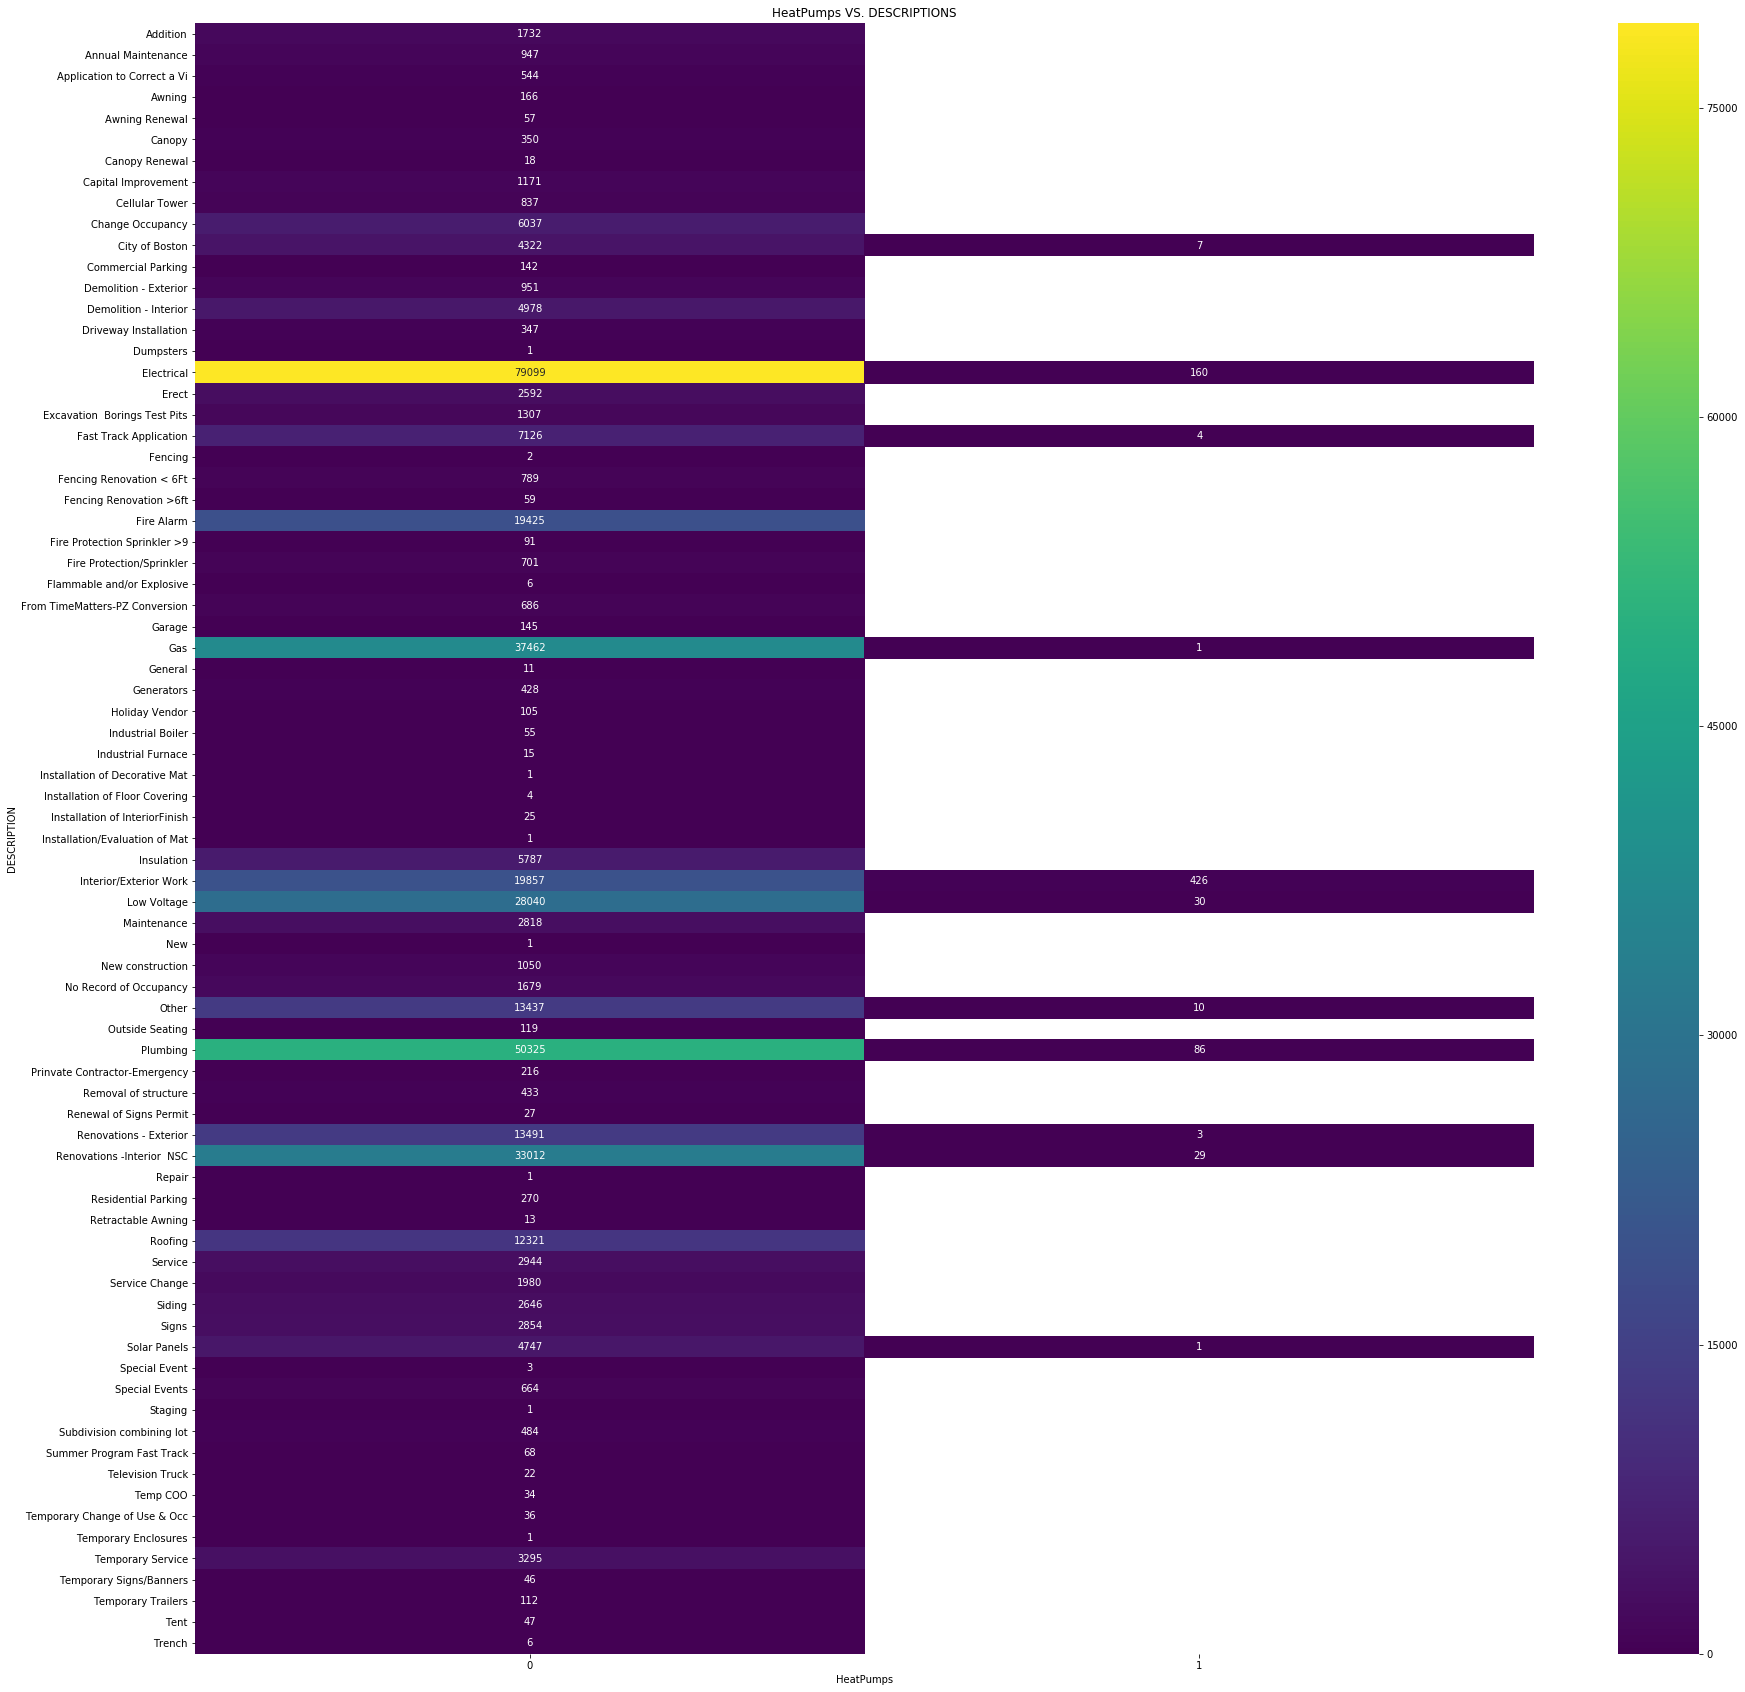

In [100]:
hm2 = permits[["DESCRIPTION", "HeatPumps"]].pivot_table(index='DESCRIPTION', columns='HeatPumps', aggfunc=len, fill_value = 0)

fig2, ax2c= plt.subplots(figsize=(30,30)) 
ax2 = sns.heatmap(hm2, annot=True, mask = hm2 == 0, fmt="g", cmap='viridis')
ax2.set_title('HeatPumps VS. DESCRIPTIONS')
plt.show()

#Heat Pumps 0 means not Exist

In [153]:
permits[["PermitTypeDescr", "DESCRIPTION", "HeatPumps"]].pivot_table(index=["PermitTypeDescr", "DESCRIPTION"], columns= 'HeatPumps', aggfunc=len, fill_value = 0)

HeatPumps                                                  0  1
PermitTypeDescr          DESCRIPTION                           
Amendment to a Long Form Addition                        105  0
                         Application to Correct a Vi       9  0
                         Awning                            6  0
                         Canopy                            2  0
                         Cellular Tower                    7  0
                         Change Occupancy                 11  0
                         City of Boston                   23  0
                         Demolition - Exterior             6  0
                         Demolition - Interior             5  0
                         Driveway Installation             1  0
                         Electrical                        1  0
                         Erect                            48  0
                         Excavation  Borings Test Pits    12  0
                         Fast Track Application           24  0
                         Fencing Renovation >6ft           5  0
                         Fire Alarm                       84  0
                         Fire Protection Sprinkler >9     20  0
                         Fire Protection/Sprinkler       143  0
                         Garage                            3  0
                         General                           1  0
                         Generators                        3  0
                         Insulation                        4  0
                         Interior/Exterior Work          590  0
                         Low Voltage                       1  0
                         New construction                 48  0
                         Other                           512  1
                         Plumbing                          5  0
                         Renovations - Exterior          308  2
                         Renovations -Interior  NSC      706  0
                         Residential Parking               2  0
...                                                      ... ..
Short Form Bldg Permit   Subdivision combining lot         2  0
                         Summer Program Fast Track         7  0
                         Temp COO                          5  0
                         Temporary Change of Use & Occ    30  0
                         Temporary Enclosures              1  0
                         Temporary Service               105  0
                         Temporary Signs/Banners          36  0
                         Temporary Trailers               63  0
                         Tent                             45  0
                         Trench                            5  0
Use of Premises          Addition                          1  0
                         Application to Correct a Vi       2  0
                         Cellular Tower                    4  0
                         Change Occupancy                  9  0
                         City of Boston                    7  0
                         Commercial Parking              110  0
                         Driveway Installation           272  0
                         Erect                             2  0
                         Fencing Renovation < 6Ft          1  0
                         From TimeMatters-PZ Conversion   58  0
                         Interior/Exterior Work            3  0
                         New construction                  2  0
                         Other                           163  0
                         Outside Seating                  94  0
                         Renovations - Exterior            9  0
                         Renovations -Interior  NSC        1  0
                         Residential Parking             242  0
                         Special Events                   10  0
                         Temporary Change of Use & Occ     1  0
                         Tempora

In [138]:
### DESCRIPTION VS. PermitTypeDescr VS. HeatPumps
cols = pd.DataFrame(permits[["PermitTypeDescr", "DESCRIPTION", "HeatPumps"]].pivot_table(index=["PermitTypeDescr", "DESCRIPTION"], columns= 'HeatPumps', aggfunc=len, fill_value = 0)).reset_index()

In [156]:
cols.sort_values(by=['HeatPumps'], ascending = False)     # Sort by HeatPumps

,DESCRIPTIONS,PermitTypeDescr,NoHeatPumps,HeatPumps
358,Short Form Bldg Permit,Interior/Exterior Work,15217,426
131,Electrical Permit,Electrical,71220,150
310,Plumbing Permit,Plumbing,49926,86
108,Electrical Low Voltage,Low Voltage,27861,30
369,Short Form Bldg Permit,Renovations -Interior NSC,26888,20
103,Electrical Low Voltage,Electrical,3991,10
363,Short Form Bldg Permit,Other,11302,9
126,Electrical Permit,City of Boston,1323,6
275,Long Form/Alteration Permit,Renovations -Interior NSC,2990,5
252,Long Form/Alteration Permit,Fast Track Application,4576,4


In [140]:
#int(cols[[0]].iloc[0])
cols.columns = ["DESCRIPTIONS", "PermitTypeDescr", "NoHeatPumps", "HeatPumps"]

In [145]:
import plotly
plotly.tools.set_credentials_file(username='cindydzx', api_key='HLBOOijnhbIELXVO6iVt')

In [173]:
import plotly.graph_objs as go
import plotly.plotly as py

NonHeatPumps = go.Scatter(
    x=cols.DESCRIPTIONS,
    y=cols.PermitTypeDescr,
    mode='markers',
    text=cols.NoHeatPumps,
    marker=dict(
        size=cols.NoHeatPumps,
        sizemode='area',
        sizeref=2.*max(cols.NoHeatPumps)/(40.**2),
        sizemin=0,
        color="navy"
    
    ),
    name = 'NonHeatPumps'
)

HeatPumps = go.Scatter(
    x=cols.DESCRIPTIONS,
    y=cols.PermitTypeDescr,
    mode='markers',
    text =cols.HeatPumps,
    marker=dict(
        size=cols.HeatPumps,
        sizemode='area',
        sizeref=2.*max(cols.HeatPumps)/(40.**2),
        sizemin=0,
        color = 'red'
    ),
    name = 'HeatPumps',

)

data = [NonHeatPumps, HeatPumps]

layout_comp = go.Layout(
    title='PermitTypeDescr vs. Descriptions for HeatPumps&NonHeatPumps',
    hovermode='closest',
    xaxis=dict(
        title='Descriptions',
        ticklen=5,
        zeroline=False,
        gridwidth=2,
    ),
    yaxis=dict(
        title='PermitTypeDescr',
        ticklen=5,
        gridwidth=2,
    ),
)
fig_comp = go.Figure(data=data, layout=layout_comp)

py.iplot(fig_comp, filename='PermitTypeDescr VS. Description')

### annotations
### Blue is y column PermitTypeDescr
### Black is x column Description